# Movie Recommendation using Collaborative Filtering

# Alfendio Alif Faudisyah

# Import Library

In [2]:
import pandas as pd
import numpy as np 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

# Data Understanding
Tahap awal proyek untuk memahami data yang dimiliki.

In [3]:
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')

print('Data movies : ', len(movies.movieId.unique()))
print('Data ratings : ', len(ratings.userId.unique()))

Data movies :  9742
Data ratings :  610


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Cek missing value.

In [7]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

# Data Preparation

Mengubah userID menjadi list tanpa nilai yang sama

In [8]:
user_ids = ratings["userId"].unique().tolist()
print('list userID: ', user_ids)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

Melakukan encoding userID

In [9]:
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

encoded userID :  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 73: 72, 74: 73, 75: 74, 76: 75, 77: 76, 78: 77, 79: 78, 80: 79, 81: 80, 82: 81, 83: 82, 84: 83, 85: 84, 86: 85, 87: 86, 88: 87, 89: 88, 90: 89, 91: 90, 92: 91, 93: 92, 94: 93, 95: 94, 96: 95, 97: 96, 98: 97, 99: 98, 100: 99, 101: 100, 102: 101, 103: 102, 104: 103, 105: 104, 106: 105, 107: 106, 108: 107, 109: 108, 110: 109, 111: 110, 112: 111, 113: 112, 114: 113, 115: 114, 116: 115, 117: 116, 118: 117, 119: 118, 120: 119,

Melakukan proses encoding angka ke ke userID

In [10]:
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

encoded angka ke userID:  {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50, 50: 51, 51: 52, 52: 53, 53: 54, 54: 55, 55: 56, 56: 57, 57: 58, 58: 59, 59: 60, 60: 61, 61: 62, 62: 63, 63: 64, 64: 65, 65: 66, 66: 67, 67: 68, 68: 69, 69: 70, 70: 71, 71: 72, 72: 73, 73: 74, 74: 75, 75: 76, 76: 77, 77: 78, 78: 79, 79: 80, 80: 81, 81: 82, 82: 83, 83: 84, 84: 85, 85: 86, 86: 87, 87: 88, 88: 89, 89: 90, 90: 91, 91: 92, 92: 93, 93: 94, 94: 95, 95: 96, 96: 97, 97: 98, 98: 99, 99: 100, 100: 101, 101: 102, 102: 103, 103: 104, 104: 105, 105: 106, 106: 107, 107: 108, 108: 109, 109: 110, 110: 111, 111: 112, 112: 113, 113: 114, 114: 115, 115: 116, 116: 117, 117: 118, 118: 119, 1

Mengubah movieID menjadi list tanpa nilai yang sama

In [11]:
movie_ids = ratings["movieId"].unique().tolist()

Melakukan proses encoding movieID

In [12]:
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

Melakukan proses encoding angka ke movieID

In [13]:
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

## Petakan userID dan movieID ke dataframe yang berkaitan

Mapping userID ke dataframe user

In [14]:
ratings["user"] = ratings["userId"].map(user_to_user_encoded)

Mapping movieID ke dataframe movie

In [15]:
ratings["movie"] = ratings["movieId"].map(movie_to_movie_encoded)

## Cek beberapa hal dalam data seperti jumlah user, jumlah movie, dan mengubah nilai rating menjadi float

Mendapatkan jumlah user

In [16]:
num_users = len(user_to_user_encoded)
print('Jumlah user : ', num_users)

Jumlah user :  610


Mendapatkan jumlah movie

In [17]:
num_movies = len(movie_encoded_to_movie)
print('Jumlah movie : ', num_movies)

Jumlah movie :  9724


Mengubah rating menjadi nilai float

In [18]:
ratings["rating"] = ratings["rating"].values.astype(np.float32)

Nilai minimum rating

In [19]:
min_rating = min(ratings["rating"])
print('rating minimum : ', min_rating)

rating minimum :  0.5


Nilai maksimal rating

In [20]:
max_rating = max(ratings["rating"])
print('rating maksimum : ', max_rating)

rating maksimum :  5.0


## Mengacak data agar distribusinya menjadi random

In [21]:
ratings = ratings.sample(frac=1, random_state=42)
ratings

,userId,movieId,rating,timestamp,user,movie
67037,432,77866,4.5,1335139641,431,4730
42175,288,474,3.0,978465565,287,474
93850,599,4351,3.0,1498524542,598,2631
6187,42,2987,4.0,996262677,41,194
12229,75,1610,4.0,1158989841,74,727
...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873
54886,364,141,4.0,869443367,363,524
76820,480,6867,4.0,1179163171,479,2240
860,6,981,3.0,845556567,5,712


# Split Dataset

Bagi data train dan validasi dengan komposisi 90:10. Namun sebelumnya, perlu memetakan (mapping) data user dan movie menjadi satu value terlebih dahulu. Lalu buat rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training.

In [22]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = ratings[["user", "movie"]].values

# Membuat variabel y untuk membuat rating dari hasil 
y = ratings["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 90% data train dan 10% data validasi
train_indices = int(0.9 * ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [23]:
print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


# Model Development
Dengan Collaborative Filtering sistem merekomendasikan sejumlah movie berdasarkan rating yang telah diberikan sebelumnya. Dari data rating pengguna, akan dilakukan identifikasi movie yang mirip dan belum pernah ditonton oleh pengguna untuk direkomendasikan.

Model menghitung skor kecocokan antara pengguna dan movies dengan teknik embedding. Pertama, lakukan proses embedding terhadap data user dan movies. Selanjutnya, lakukan operasi perkalian dot product antara embedding user dan movies. Selain itu, juga dapat menambahkan bias untuk setiap user dan movies. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid.

## Membuat class RecommenderNet dengan keras Model class

In [24]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_movies, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movies = num_movies
    self.embedding_size = embedding_size

    # layer embedding user
    self.user_embedding = layers.Embedding( 
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )

    # layer embedding user bias
    self.user_bias = layers.Embedding(num_users, 1) 

    # layer embeddings movies
    self.movies_embedding = layers.Embedding( 
        num_movies,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )

    # layer embedding movies bias
    self.movies_bias = layers.Embedding(num_movies, 1) 
 
  def call(self, inputs):
    # memanggil layer embedding 1
    user_vector = self.user_embedding(inputs[:,0]) 

    # memanggil layer embedding 2
    user_bias = self.user_bias(inputs[:, 0]) 

    # memanggil layer embedding 3
    movies_vector = self.movies_embedding(inputs[:, 1]) 

    # memanggil layer embedding 4
    movies_bias = self.movies_bias(inputs[:, 1]) 
 
    dot_user_movies = tf.tensordot(user_vector, movies_vector, 2) 
 
    x = dot_user_movies + user_bias + movies_bias
    
    # activation sigmoid
    return tf.nn.sigmoid(x) 

## Model summary

In [55]:
model.summary()

Model: "recommender_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  30500     
                                                                 
 embedding_1 (Embedding)     multiple                  610       
                                                                 
 embedding_2 (Embedding)     multiple                  486200    
                                                                 
 embedding_3 (Embedding)     multiple                  9724      
                                                                 
Total params: 527,034
Trainable params: 527,034
Non-trainable params: 0
_________________________________________________________________


## Compile Model

In [25]:
# inisialisasi model
model = RecommenderNet(num_users, num_movies, 50) 
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Training Model

In [26]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 20,
    verbose = 1,
    validation_data = (x_val, y_val)
)

Epoch 1/20
11344/11344 [==============================] - 134s 12ms/step - loss: 0.6252 - root_mean_squared_error: 0.2207 - val_loss: 0.6132 - val_root_mean_squared_error: 0.2066
Epoch 2/20
11344/11344 [==============================] - 130s 11ms/step - loss: 0.6045 - root_mean_squared_error: 0.1979 - val_loss: 0.6089 - val_root_mean_squared_error: 0.2015
Epoch 3/20
11344/11344 [==============================] - 137s 12ms/step - loss: 0.5998 - root_mean_squared_error: 0.1924 - val_loss: 0.6085 - val_root_mean_squared_error: 0.2009
Epoch 4/20
11344/11344 [==============================] - 132s 12ms/step - loss: 0.5974 - root_mean_squared_error: 0.1896 - val_loss: 0.6084 - val_root_mean_squared_error: 0.2005
Epoch 5/20
11344/11344 [==============================] - 132s 12ms/step - loss: 0.5962 - root_mean_squared_error: 0.1880 - val_loss: 0.6081 - val_root_mean_squared_error: 0.2003
Epoch 6/20
11344/11344 [==============================] - 124s 11ms/step - loss: 0.5946 - root_mean_squar

## Visualisasi Training
Melihat visualisasi proses training, plot metrik evaluasi dengan matplotlib.

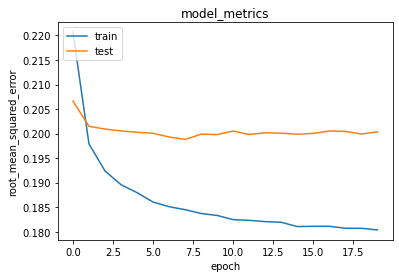

In [27]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Dapat dilihat dari visualisasi, nilai sudah bagus untuk digunakan sebagai sistem rekomendasi. Diperoleh nilai RMSE 0.1804 dan val RMSE 0.2003.

# Evaluasi

In [59]:
model.evaluate(x_val, y_val)

316/316 [==============================] - 3s 10ms/step - loss: 0.6227 - root_mean_squared_error: 0.2132


[0.6226679086685181, 0.21319271624088287]

# Rekomendasi Movie

Ambil sampel user secara acak dan definisikan variabel movie_not_visited yang merupakan daftar movie yang belum pernah ditonton oleh pengguna. Daftar movie_not_visited inilah yang akan menjadi movie yang direkomendasikan.

Rating digunakan untuk membuat rekomendasi movie yang mungkin cocok untuk pengguna. movie yang akan direkomendasikan tentulah movie yang belum pernah ditonton oleh pengguna.

In [42]:
movie_df = pd.read_csv('ml-latest-small/movies.csv')
df = pd.read_csv('ml-latest-small/ratings.csv')

# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movies_watched_by_user = df[df.userId == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
movies_not_watched = movie_df[
    ~movie_df["movieId"].isin(movies_watched_by_user.movieId.values)
]["movieId"]
movies_not_watched = list(
    set(movies_not_watched).intersection(set(movie_to_movie_encoded.keys()))
)

movies_not_watched = [[movie_to_movie_encoded.get(x)] for x in movies_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)

## Prediksi untuk mendapatkan rekomendasi

Fungsi model.predict() dari library Keras untuk memperoleh rekomendasi movie.

In [54]:
ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Movies with high ratings from user")
print("----" * 8)

top_movies_user = (
    movies_watched_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df["movieId"].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ":", row.genres)

print("----" * 8)
print("Top 10 movie recommendations")
print("----" * 8)

recommended_movies = movie_df[movie_df["movieId"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ":", row.genres)

274/274 [==============================] - 2s 5ms/step
Showing recommendations for user: 66
Movies with high ratings from user
--------------------------------
Sixth Sense, The (1999) : Drama|Horror|Mystery
Memento (2000) : Mystery|Thriller
Punch-Drunk Love (2002) : Comedy|Drama|Romance
Gallipoli (1981) : Drama|War
Matchstick Men (2003) : Comedy|Crime|Drama
--------------------------------
Top 10 movie recommendations
--------------------------------
Women, The (1939) : Comedy
Sleepers (1996) : Thriller
Aladdin and the King of Thieves (1996) : Animation|Children|Comedy|Fantasy|Musical|Romance
Old Man and the Sea, The (1958) : Adventure|Drama
Nightmare on Elm Street 2: Freddy's Revenge, A (1985) : Horror
Popeye (1980) : Adventure|Comedy|Musical
Red Violin, The (Violon rouge, Le) (1998) : Drama|Mystery
AVP: Alien vs. Predator (2004) : Action|Horror|Sci-Fi|Thriller
Land of the Dead (2005) : Action|Horror|Thriller
Legionnaire (1998) : Action|Adventure|Drama|War


Dari output tersebut, dapat membandingkan antara Movies with high ratings from user dan Top 10 movie recommendation untuk user.